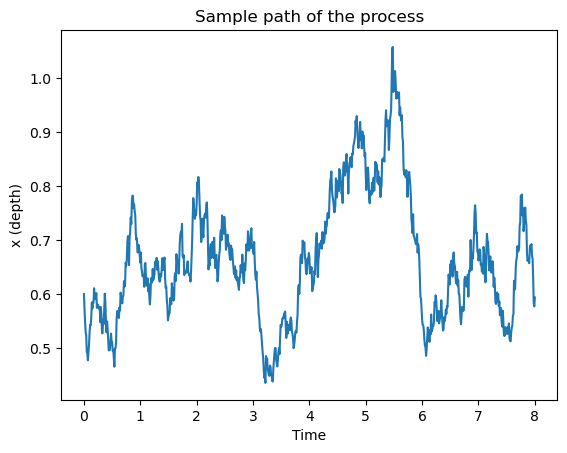

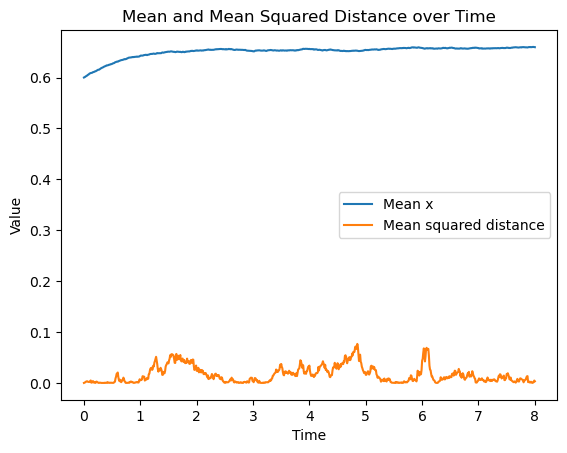

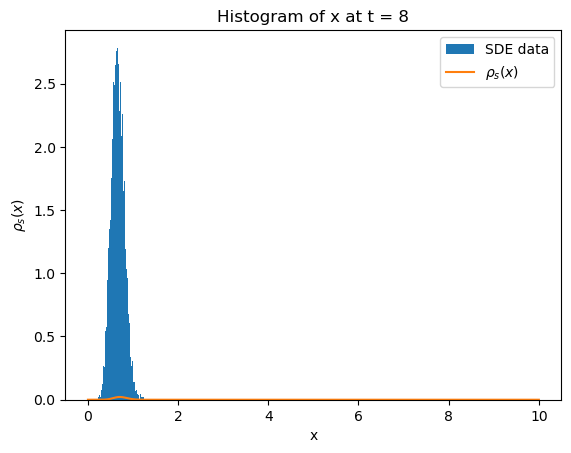

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
# Set up random number generator with seed
rng = np.random.default_rng(8)
def generate_wiener_process(T, steps):
    W_0 = 0
    dW = rng.normal(0, np.sqrt(T / steps), steps)
    dW = np.insert(dW, 0, W_0, axis=0)
    W = np.cumsum(dW, axis=0)
    return W
def milstein_method(gamma, sigma, T, steps, x_0):
    x = np.zeros(steps + 1)
    dt = T / steps
    x[0] = x_0

    for i in range(steps):
        dW = np.sqrt(dt) * rng.normal()
        x[i + 1] = x[i] + (gamma * x[i] - x[i]**3) * dt + sigma * x[i] * dW \
                   + 0.5 * sigma * x[i] * (dW**2 - dt)
    return x
# Parameters
x_0 = 0.6
gamma = 0.5
sigma = 0.3
T = 8
dt = 0.01
steps = int(T / dt)
time = np.linspace(0, T, steps + 1)
x_path = milstein_method(gamma, sigma, T, steps, x_0)
plt.plot(time, x_path)
plt.xlabel('Time')
plt.ylabel('x (depth)')
plt.title('Sample path of the process')
plt.show()
# Calculate alpha
alpha = (2 * gamma) / (sigma**2)
# To generate a sample of 5000 realizations and analyze them
samples = 5000
end_values = np.zeros(samples)
mean = np.zeros(steps + 1)
mean_sq_d = np.zeros(steps + 1)
for i in range(samples):
    x = milstein_method(gamma, sigma, T, steps, x_0)
    mean += x
    end_values[i] = x[-1]
mean /= samples
# Calculate mean squared distance
for i in range(samples):
    mean_sq_d += (x - mean)**2
mean_sq_d /= samples
plt.plot(time, mean, label='Mean x')
plt.plot(time, mean_sq_d, label='Mean squared distance')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Mean and Mean Squared Distance over Time')
plt.show()
# Calculate histogram
plt.hist(end_values, bins=50, density=True, label='SDE data')
plt.xlabel('x')
plt.ylabel(r'$\rho_s(x)$')
plt.title('Histogram of x at t = 8')
plt.legend()
# Plot ρs(x)
x_values = np.linspace(0, 10, 1000)
N = 1 / (sigma**(1 + alpha) * special.iv(0, alpha))
rho_s = N * (x_values**alpha) * np.exp(-(x_values**2) / sigma**2)
plt.plot(x_values, rho_s, label=r'$\rho_s(x)$')
plt.legend()
plt.show()
